## ================================ PT. 3 ================================
#  >>>>>>>>>>>>>>>>>>>> MACHINE LEARNING <<<<<<<<<<<<<<<<<<<<
## =====================================================================

In [258]:
import numpy as np
import geopandas as gpd
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Regression
###  –––––––––––––––

In [259]:
BusMRTGeoData = pd.read_csv('BusMRTGeoDataSubzone.csv')
BusMRTGeoData

,SUBZONE_N,BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK,BUS_TAP_IN_TAP_OUT_VOLUME_PEAK,BUS_TAP_IN_TAP_OUT_VOLUME_WEEKDAY,BUS_TAP_IN_TAP_OUT_VOLUME_WEEKLY,BUS_PEAK_HOUR_PERCENTAGE (%),BUS_WEEKDAY_PERCENTAGE (%),MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK,MRT_TAP_IN_TAP_OUT_VOLUME_PEAK,MRT_TAP_IN_TAP_OUT_VOLUME_WEEKDAY,...,TAP_IN_TAP_OUT_VOLUME_WEEKDAY,TAP_IN_TAP_OUT_VOLUME_WEEKLY,PEAK_HOUR_PERCENTAGE (%),WEEKDAY_PERCENTAGE (%),"('2020', 'Male Percentage')","('2020', '00 - 19')","('2020', '20 - 39')","('2020', '40 - 59')","('2020', '60 & Over')","('2020', 'Average Income')"
0,ALJUNIED,272101.0,1524723.0,1602735.0,9329329.0,16.343330,85.897657,205135.0,1125054.0,1067636.0,...,2670371.0,15454280.0,17.145910,86.395840,0.493623,6150,10720,12170,10940,11730.102220
1,ANAK BUKIT,78683.0,435307.0,478669.0,2742579.0,15.872177,87.266219,68900.0,383243.0,371088.0,...,849757.0,4909818.0,16.671697,86.536507,0.474166,4280,5660,6190,5750,19739.484317
2,ANCHORVALE,80421.0,443213.0,542681.0,3076215.0,14.407738,88.205961,42201.0,231522.0,269032.0,...,811713.0,4596871.0,14.678136,88.289730,0.492519,13550,14460,13710,6410,10559.805071
3,BEDOK NORTH,514937.0,2876278.0,3408440.0,19588547.0,14.683468,87.000838,185128.0,1020027.0,1017300.0,...,4425740.0,25472206.0,15.296300,86.873905,0.485093,13230,20760,24610,23260,8815.353975
4,BEDOK RESERVOIR,107940.0,598335.0,651821.0,3731588.0,16.034326,87.338286,47536.0,256282.0,226403.0,...,878224.0,5012083.0,17.051134,87.610680,0.489988,5280,6820,7960,5420,12406.950807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,WOODLANDS EAST,283127.0,1552276.0,1710348.0,9687117.0,16.024128,88.279516,289600.0,1574654.0,1579028.0,...,3289376.0,18614145.0,16.798676,88.356892,0.499949,23130,30470,31480,13910,9709.300993
82,WOODLANDS WEST,129634.0,719971.0,850840.0,4838125.0,14.881199,87.930758,125307.0,689116.0,728756.0,...,1579596.0,8975706.0,15.698899,87.992855,0.508994,6220,10300,9840,7560,7374.195426
83,YEW TEE,107981.0,598776.0,708942.0,4064449.0,14.732034,87.212559,194970.0,1054779.0,1037986.0,...,1746928.0,9926964.0,16.657208,87.989037,0.497771,8460,11480,13730,6730,11017.340267
84,YIO CHU KANG,114012.0,604035.0,549487.0,3002239.0,20.119484,91.512868,174329.0,916778.0,815902.0,...,1365389.0,7430472.0,20.467246,91.877676,NaN,0,0,0,0,NaN


In [260]:
BusMRTGeoData_reg = BusMRTGeoData.filter(['SUBZONE_N', 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', 'PEAK_HOUR_PERCENTAGE (%)', 'WEEKDAY_PERCENTAGE (%)', "('2020', 'Male Percentage')", "('2020', '00 - 19')", "('2020', '20 - 39')", "('2020', '40 - 59')", "('2020', '60 & Over')", "('2020', 'Average Income')"], axis = 1)
BusMRTGeoData_reg['PEAK_HOUR_PERCENTAGE (%)'] = BusMRTGeoData_reg['PEAK_HOUR_PERCENTAGE (%)']/100
BusMRTGeoData_reg['WEEKDAY_PERCENTAGE (%)'] = BusMRTGeoData_reg['WEEKDAY_PERCENTAGE (%)']/100
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={'PEAK_HOUR_PERCENTAGE (%)': 'Peak Hour Percentage'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"WEEKDAY_PERCENTAGE (%)": 'Weekday Percentage'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', 'Male Percentage')": 'Male Percentage'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', '00 - 19')": '00 - 19'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', '20 - 39')": '20 - 39'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', '40 - 59')": '40 - 59'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', '60 & Over')": '60 & Over'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', 'Average Income')": 'Average Income'})
BusMRTGeoData_reg['Male Percentage'] = BusMRTGeoData_reg['Male Percentage'].replace(np.nan, 0) #Replace '-' with '0'
BusMRTGeoData_reg['Average Income'] = BusMRTGeoData_reg['Average Income'].replace(np.nan, 0) #Replace '-' with '0'
BusMRTGeoData_reg

,SUBZONE_N,TAP_IN_TAP_OUT_VOLUME_WEEKLY,Peak Hour Percentage,Weekday Percentage,Male Percentage,00 - 19,20 - 39,40 - 59,60 & Over,Average Income
0,ALJUNIED,15454280.0,0.171459,0.863958,0.493623,6150,10720,12170,10940,11730.102220
1,ANAK BUKIT,4909818.0,0.166717,0.865365,0.474166,4280,5660,6190,5750,19739.484317
2,ANCHORVALE,4596871.0,0.146781,0.882897,0.492519,13550,14460,13710,6410,10559.805071
3,BEDOK NORTH,25472206.0,0.152963,0.868739,0.485093,13230,20760,24610,23260,8815.353975
4,BEDOK RESERVOIR,5012083.0,0.170511,0.876107,0.489988,5280,6820,7960,5420,12406.950807
...,...,...,...,...,...,...,...,...,...,...
81,WOODLANDS EAST,18614145.0,0.167987,0.883569,0.499949,23130,30470,31480,13910,9709.300993
82,WOODLANDS WEST,8975706.0,0.156989,0.879929,0.508994,6220,10300,9840,7560,7374.195426
83,YEW TEE,9926964.0,0.166572,0.879890,0.497771,8460,11480,13730,6730,11017.340267
84,YIO CHU KANG,7430472.0,0.204672,0.918777,0.000000,0,0,0,0,0.000000


## Univariate Linear Models

### Variable 1: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using Peak Hour Percentage

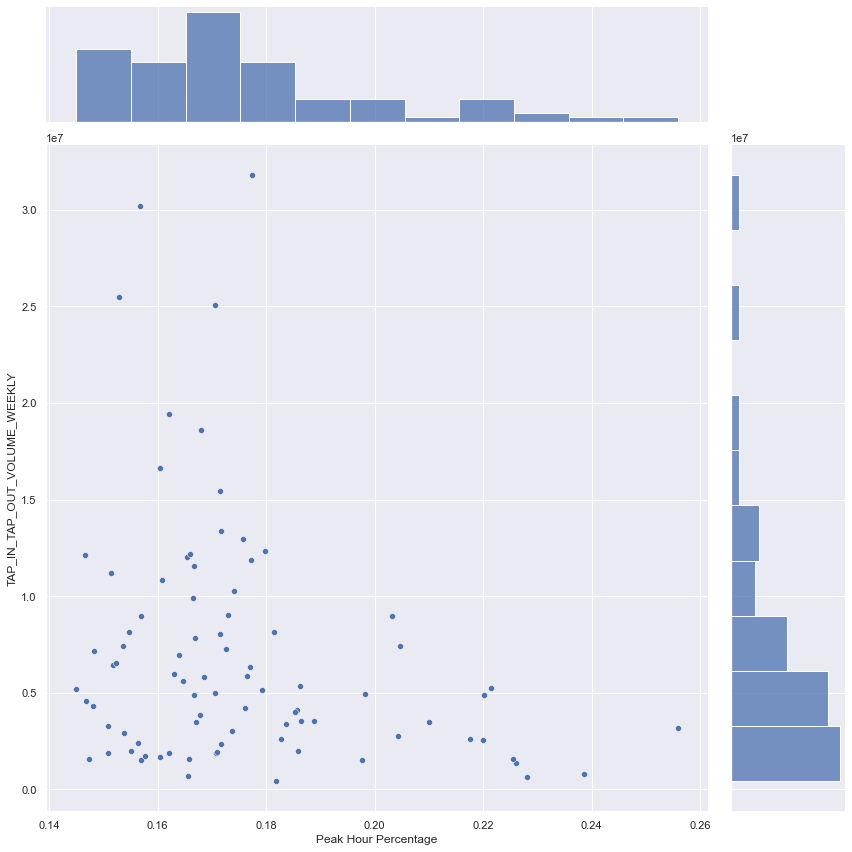

In [261]:
sb.jointplot(data = BusMRTGeoData_reg, x = 'Peak Hour Percentage', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [262]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['Peak Hour Percentage'])

-0.2516931050720493

In [263]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['Peak Hour Percentage'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [264]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [265]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [19682820.86079232]
Coefficients 	: a =  [[-71968414.48563427]]


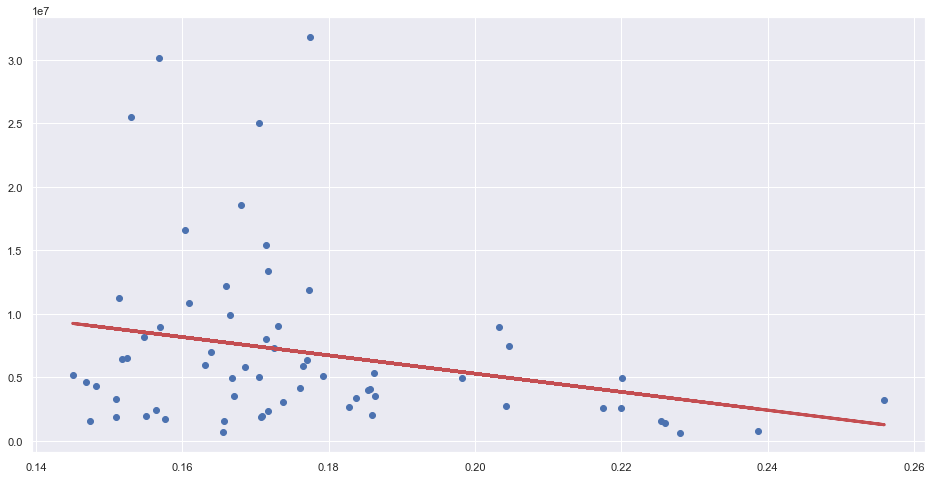

In [266]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [267]:
# Explained Variance in simply the "Score"
ev1 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev1)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse1 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse1)

Explained Variance (R^2) 	: 0.06714677759214738
Mean Squared Error (MSE) 	: 42717161256900.3


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `Peak Hour Percentage` in the Test dataset.

In [268]:
y_test_pred = linreg.predict(X_test)

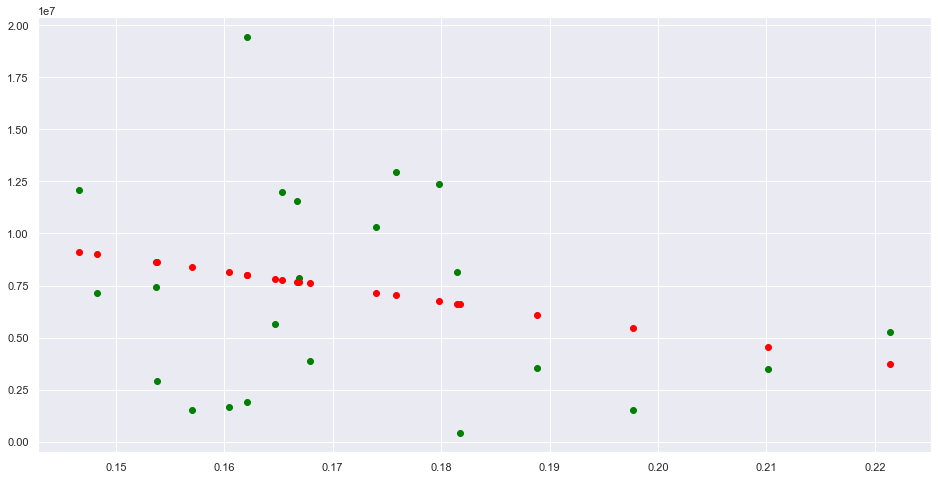

In [269]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [270]:
# Explained Variance in simply the "Score"
evTest1 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest1)
mseTest1 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest1)

Explained Variance (R^2) 	: 0.039681731860989444
Mean Squared Error (MSE) 	: 22519622637624.734


### Variable 2: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using Weekday Percentage

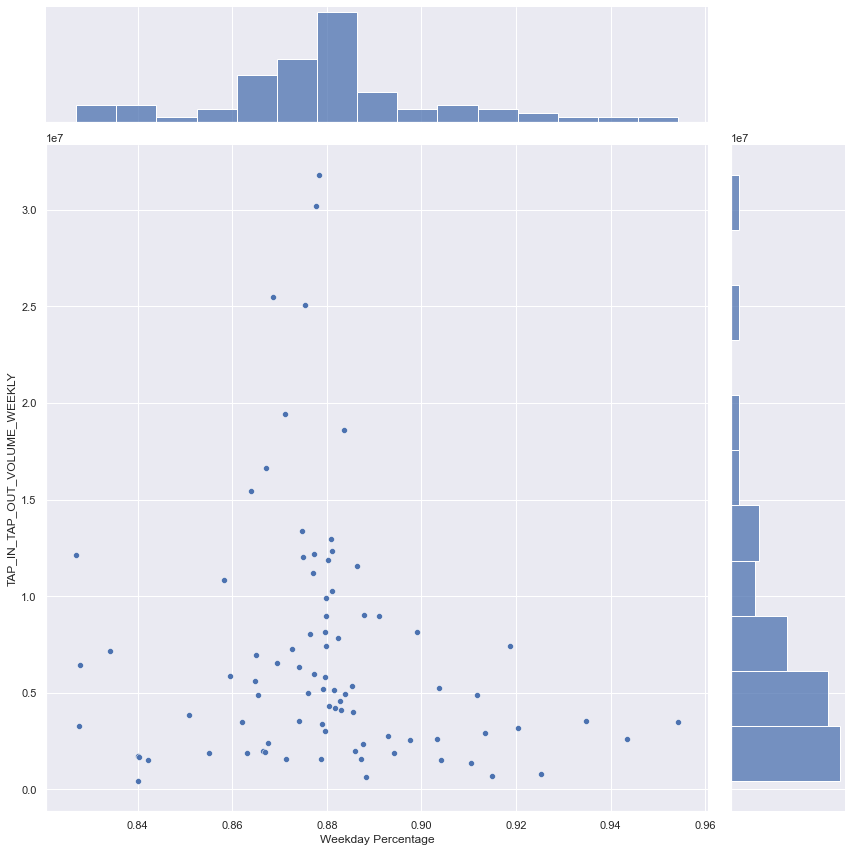

In [271]:
sb.jointplot(data = BusMRTGeoData_reg, x = 'Weekday Percentage', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [272]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['Weekday Percentage'])

-0.12952487449334363

In [273]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['Weekday Percentage'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [274]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [275]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [33887002.85998498]
Coefficients 	: a =  [[-30904859.08968294]]


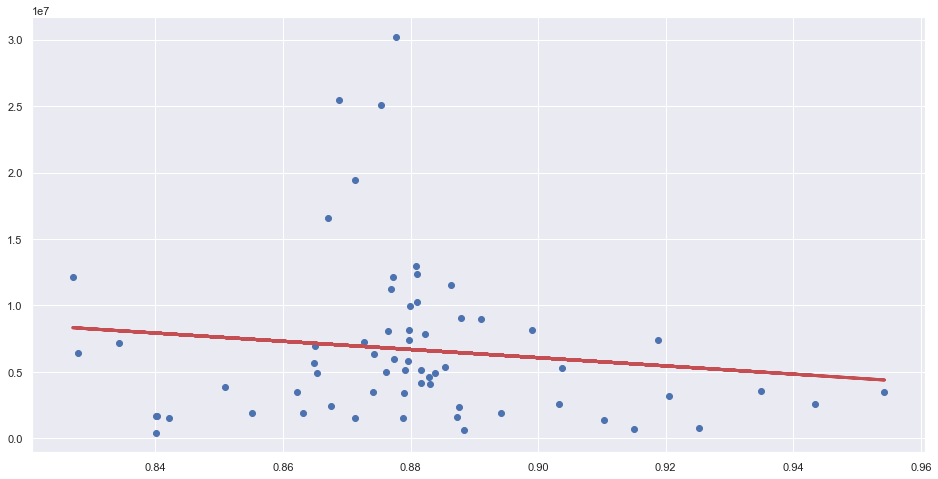

In [276]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [277]:
# Explained Variance in simply the "Score"
ev2 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev2)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse2 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse2)

Explained Variance (R^2) 	: 0.016370995552130396
Mean Squared Error (MSE) 	: 35335496500481.266


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `Weekday Percentage` in the Test dataset.

In [278]:
y_test_pred = linreg.predict(X_test)

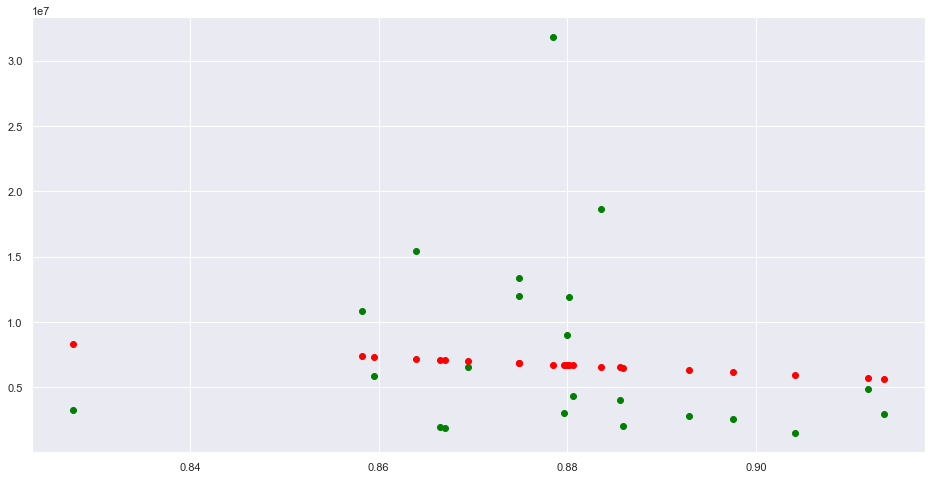

In [279]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [280]:
# Explained Variance in simply the "Score"
evTest2 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest2)
mseTest2 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest2)

Explained Variance (R^2) 	: -0.004405371599638386
Mean Squared Error (MSE) 	: 51548198770905.83


### Variable 3: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using Male Percentage

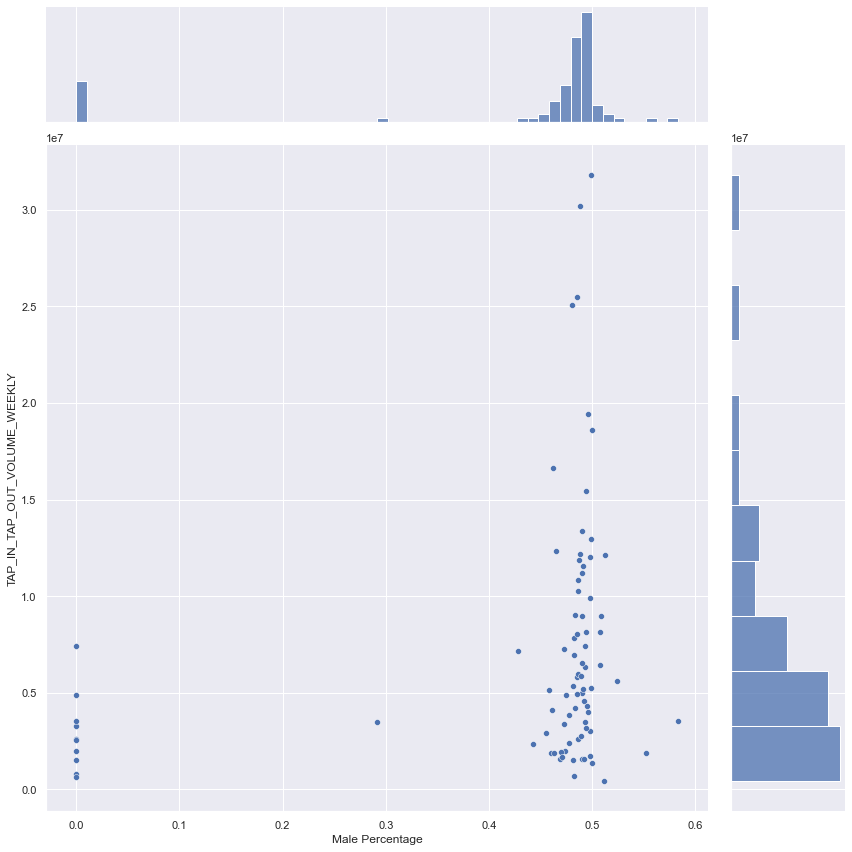

In [281]:
sb.jointplot(data = BusMRTGeoData_reg, x = 'Male Percentage', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [282]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['Male Percentage'])

0.24232609709596914

In [283]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['Male Percentage'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [284]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [285]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [3012972.54389643]
Coefficients 	: a =  [[8096814.10068757]]


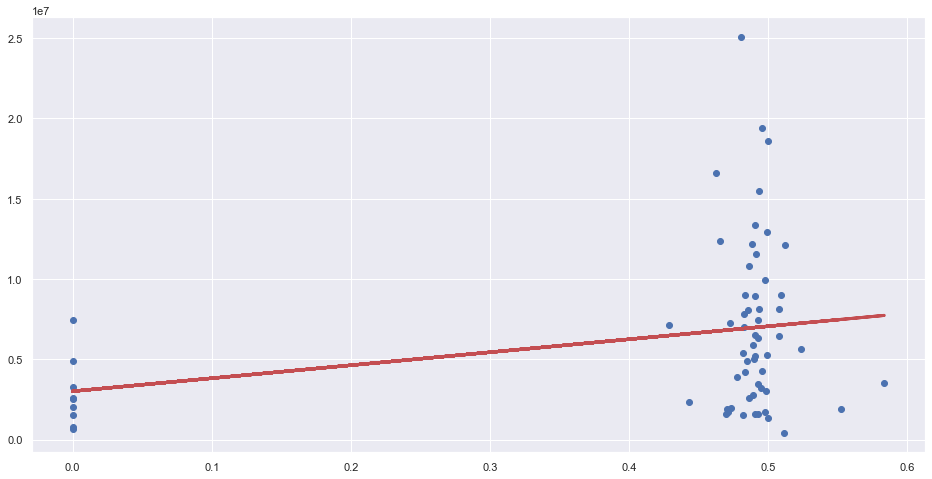

In [286]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [287]:
# Explained Variance in simply the "Score"
ev3 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev3)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse3 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse3)

Explained Variance (R^2) 	: 0.0748892025705381
Mean Squared Error (MSE) 	: 23901150507811.97


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `Male Percentage` in the Test dataset.

In [288]:
y_test_pred = linreg.predict(X_test)

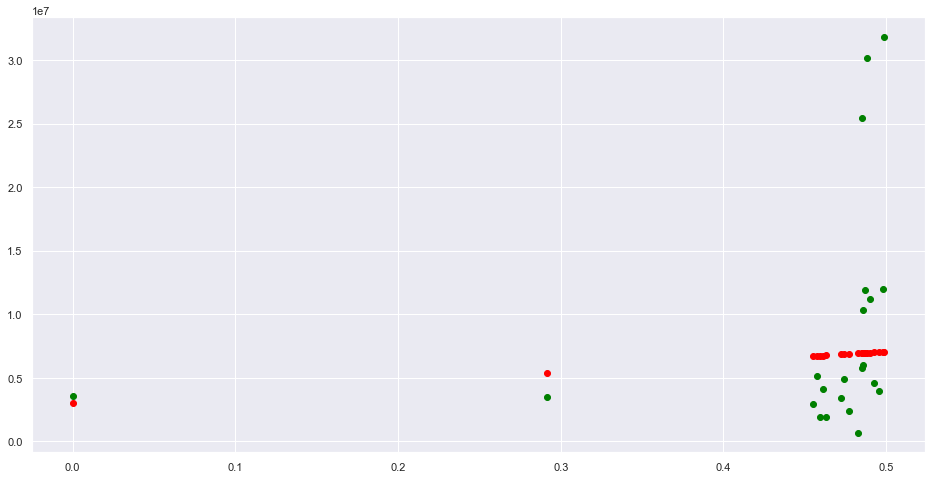

In [289]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [290]:
# Explained Variance in simply the "Score"
evTest3 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest3)
mseTest3 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest3)

Explained Variance (R^2) 	: -0.011009087540479356
Mean Squared Error (MSE) 	: 79083968388404.69


### Variable 4: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using 00 - 19

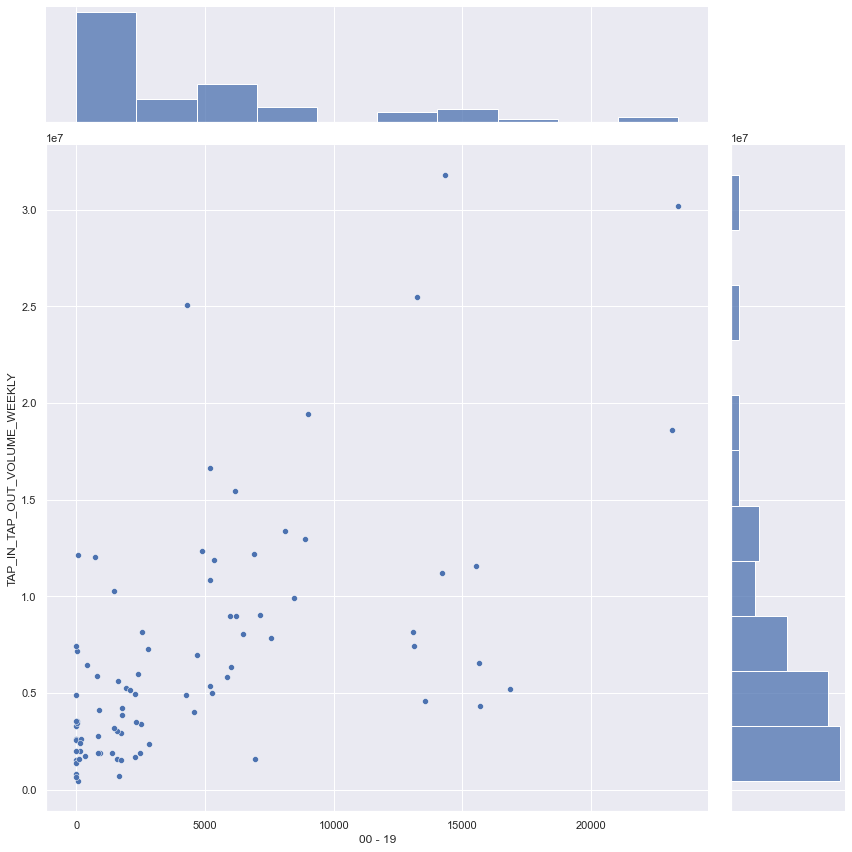

In [291]:
sb.jointplot(data = BusMRTGeoData_reg, x = '00 - 19', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [292]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['00 - 19'])

0.6164596239700507

In [293]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['00 - 19'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [294]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [295]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [3403987.71632981]
Coefficients 	: a =  [[750.27647071]]


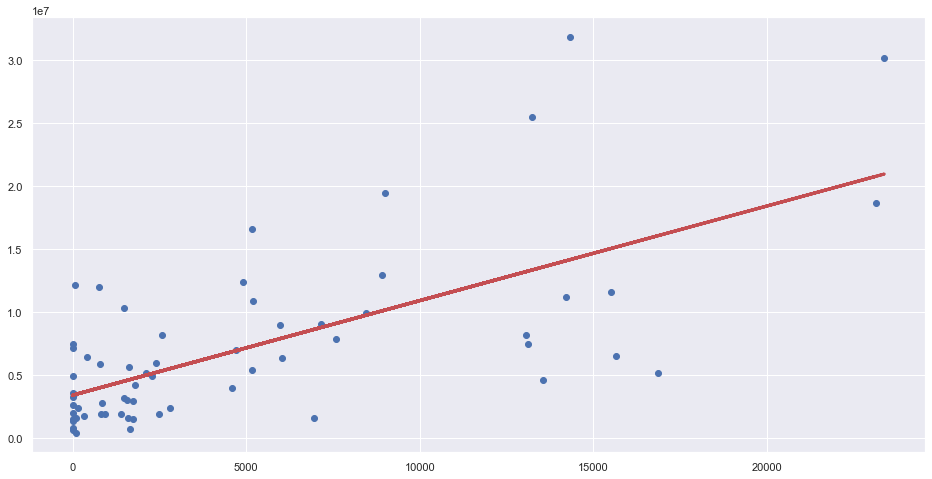

In [296]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [297]:
# Explained Variance in simply the "Score"
ev4 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev4)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse4 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse4)

Explained Variance (R^2) 	: 0.44700620418766046
Mean Squared Error (MSE) 	: 24051206385210.305


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `00 - 19` in the Test dataset.

In [298]:
y_test_pred = linreg.predict(X_test)

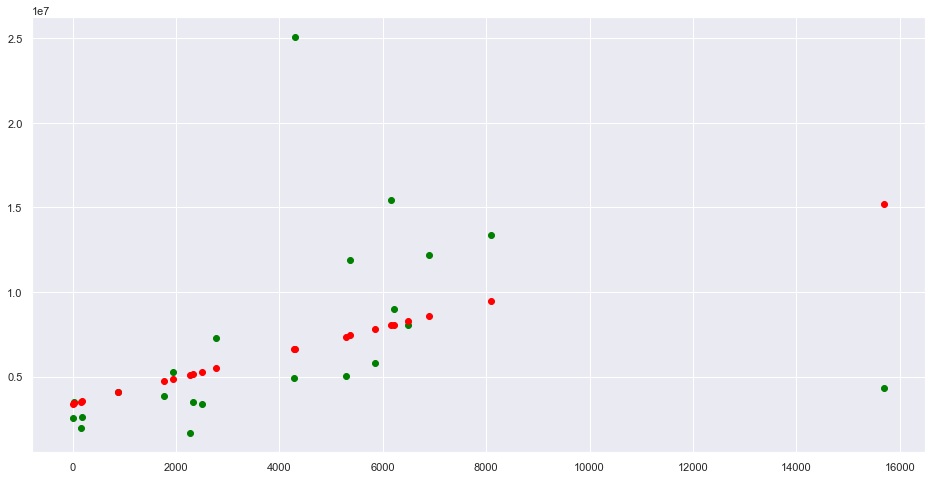

In [299]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [300]:
# Explained Variance in simply the "Score"
evTest4 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest4)
mseTest4 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest4)

Explained Variance (R^2) 	: 0.09345077506372912
Mean Squared Error (MSE) 	: 27317156425120.2


### Variable 5: Predicting AP_IN_TAP_OUT_VOLUME_WEEKLY using 20 - 39

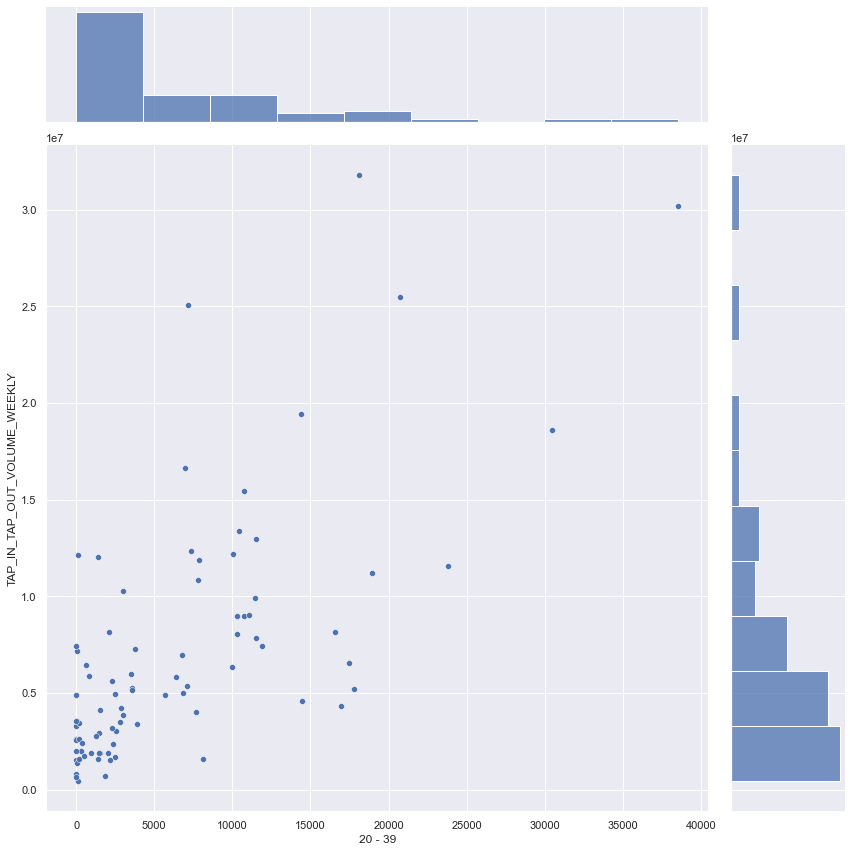

In [301]:
sb.jointplot(data = BusMRTGeoData_reg, x = '20 - 39', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [302]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['20 - 39'])

0.6952759625021925

In [303]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['20 - 39'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [304]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [305]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [3136392.90907835]
Coefficients 	: a =  [[591.47472235]]


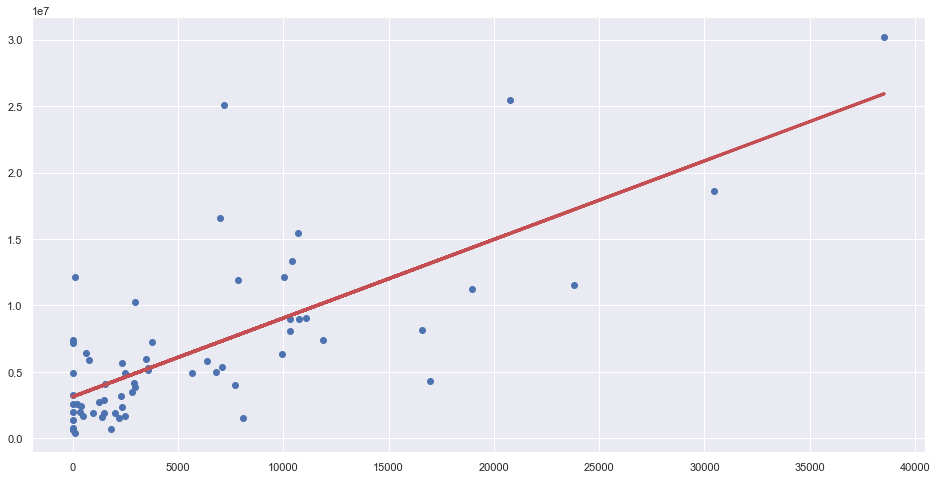

In [306]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [307]:
# Explained Variance in simply the "Score"
ev5 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev5)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse5 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse5)

Explained Variance (R^2) 	: 0.5422221783340766
Mean Squared Error (MSE) 	: 16992577565800.861


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `20 - 39` in the Test dataset.

In [308]:
y_test_pred = linreg.predict(X_test)

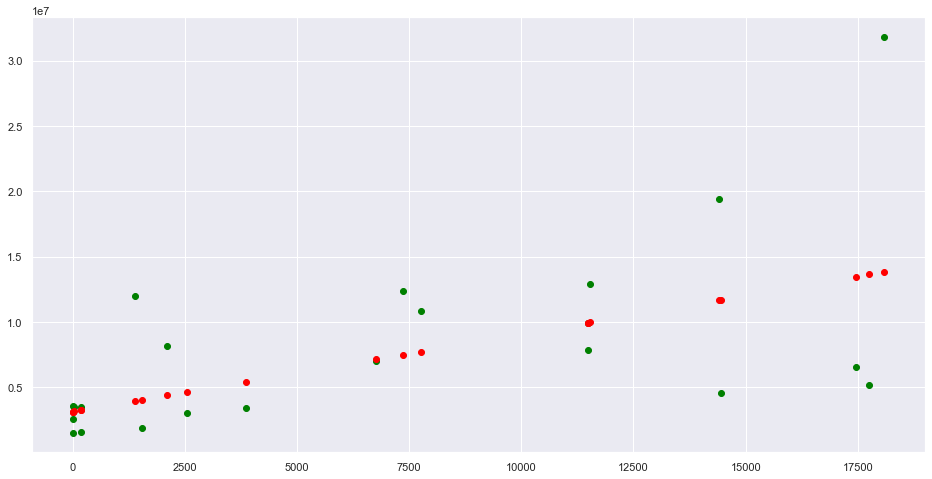

In [309]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [310]:
# Explained Variance in simply the "Score"
evTest5 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest5)
mseTest5 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest5)

Explained Variance (R^2) 	: 0.3350891292067484
Mean Squared Error (MSE) 	: 31636501028075.465


### Variable 6: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using 40 - 59

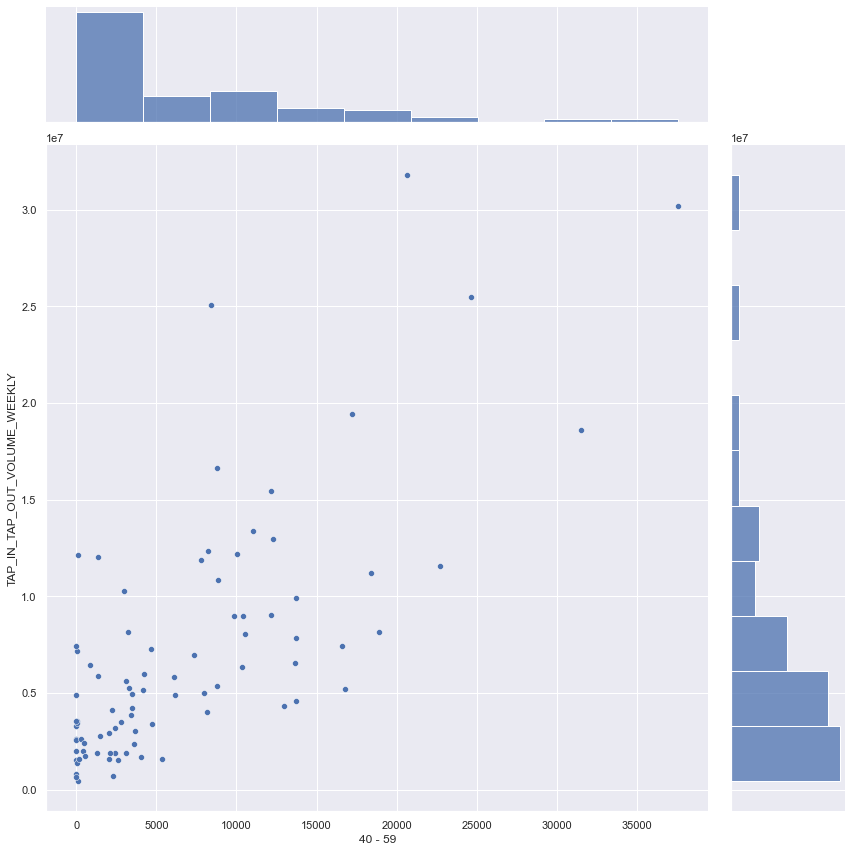

In [311]:
sb.jointplot(data = BusMRTGeoData_reg, x = '40 - 59', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [312]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['40 - 59'])

0.7356997525223683

In [313]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['40 - 59'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [314]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [315]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [2407023.21252031]
Coefficients 	: a =  [[678.24740835]]


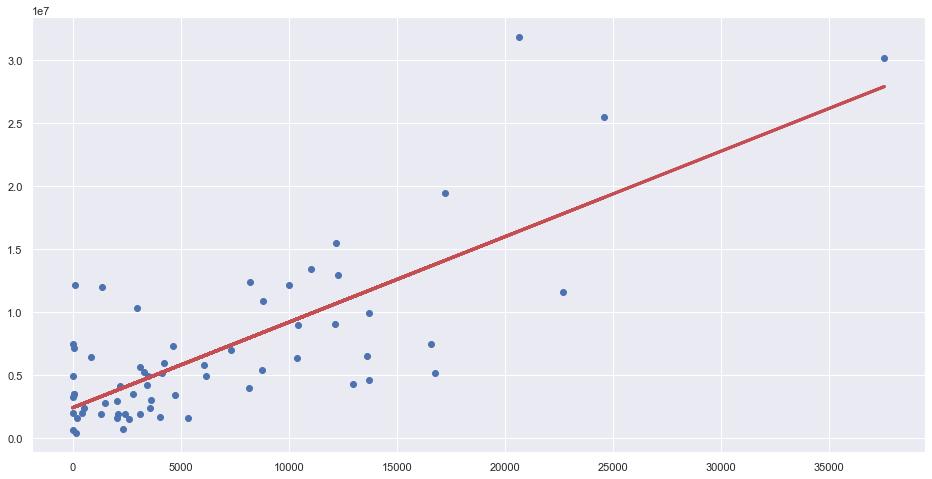

In [316]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [317]:
# Explained Variance in simply the "Score"
ev6 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev6)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse6 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse6)

Explained Variance (R^2) 	: 0.5873223832454292
Mean Squared Error (MSE) 	: 16856433895108.129


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `40 - 59` in the Test dataset.

In [318]:
y_test_pred = linreg.predict(X_test)

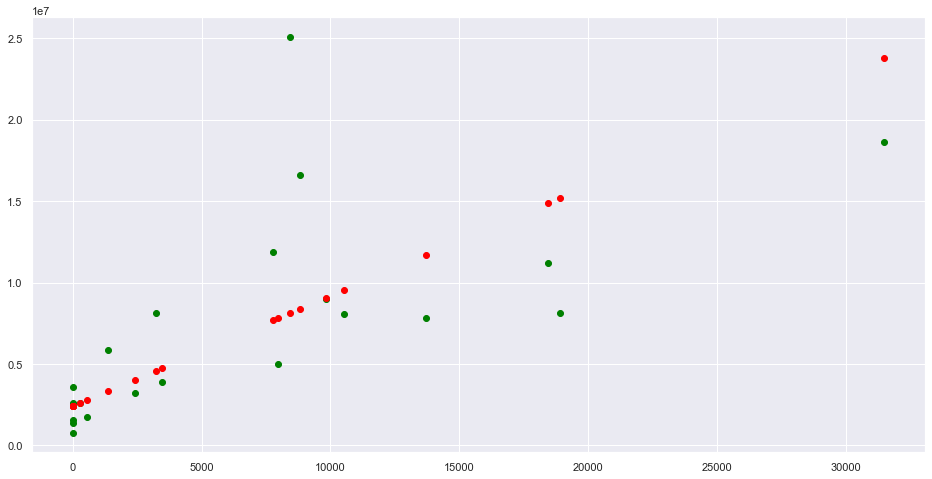

In [319]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [320]:
# Explained Variance in simply the "Score"
evTest6 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest6)
mseTest6 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest6)

Explained Variance (R^2) 	: 0.37965713690033565
Mean Squared Error (MSE) 	: 23409476063930.12


### Variable 7: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using 60 & Over

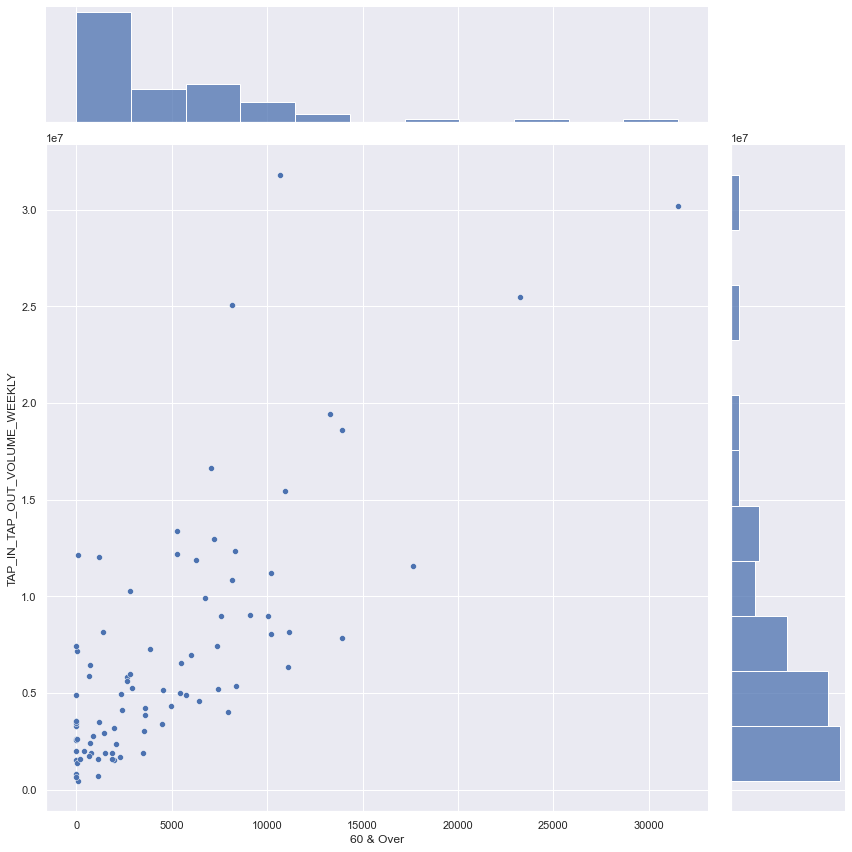

In [321]:
sb.jointplot(data = BusMRTGeoData_reg, x = '60 & Over', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [322]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['60 & Over'])

0.7503595742097162

In [323]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['60 & Over'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [324]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [325]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [3040921.57048516]
Coefficients 	: a =  [[817.63171218]]


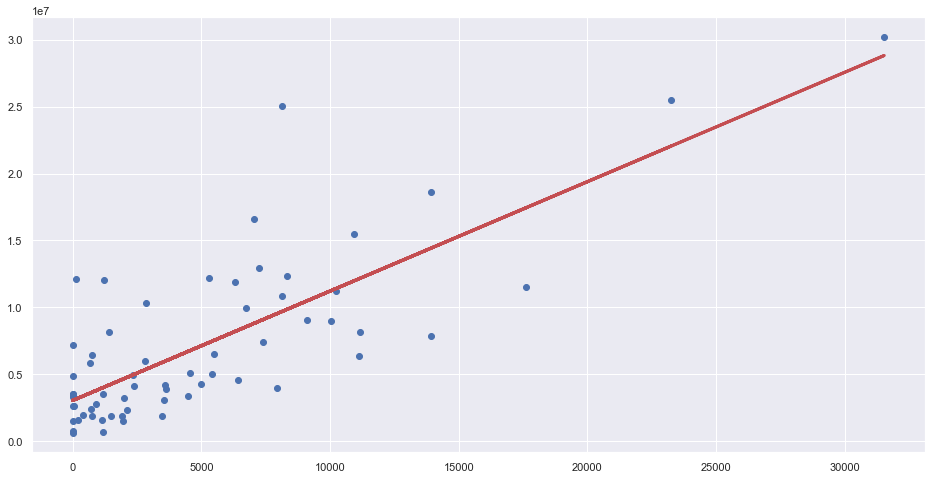

In [326]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [327]:
# Explained Variance in simply the "Score"
ev7 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev7)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse7 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse7)

Explained Variance (R^2) 	: 0.6091440104607524
Mean Squared Error (MSE) 	: 14613740412616.453


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `60 & Over` in the Test dataset.

In [328]:
y_test_pred = linreg.predict(X_test)

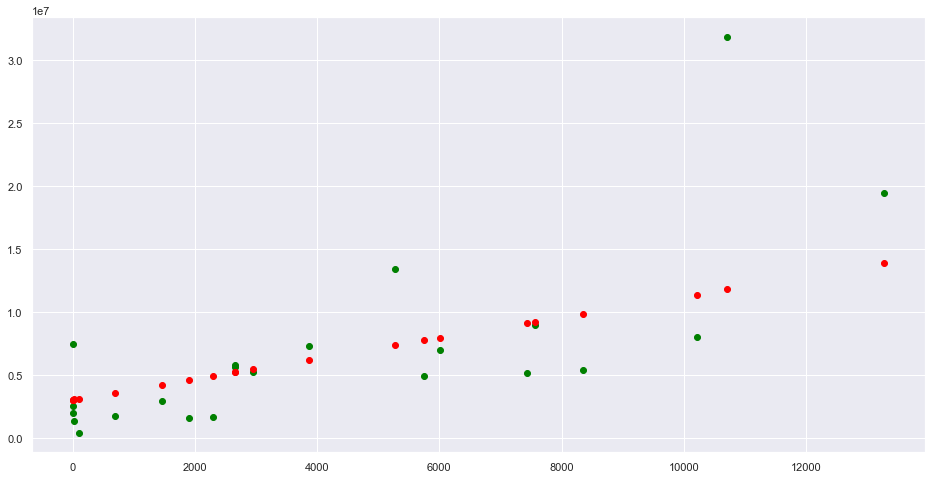

In [329]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [330]:
# Explained Variance in simply the "Score"
evTest7 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest7)
mseTest7 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest7)

Explained Variance (R^2) 	: 0.4486736458091949
Mean Squared Error (MSE) 	: 26387096207648.83


### Variable 8: Predicting TAP_IN_TAP_OUT_VOLUME_WEEKLY using Average Income

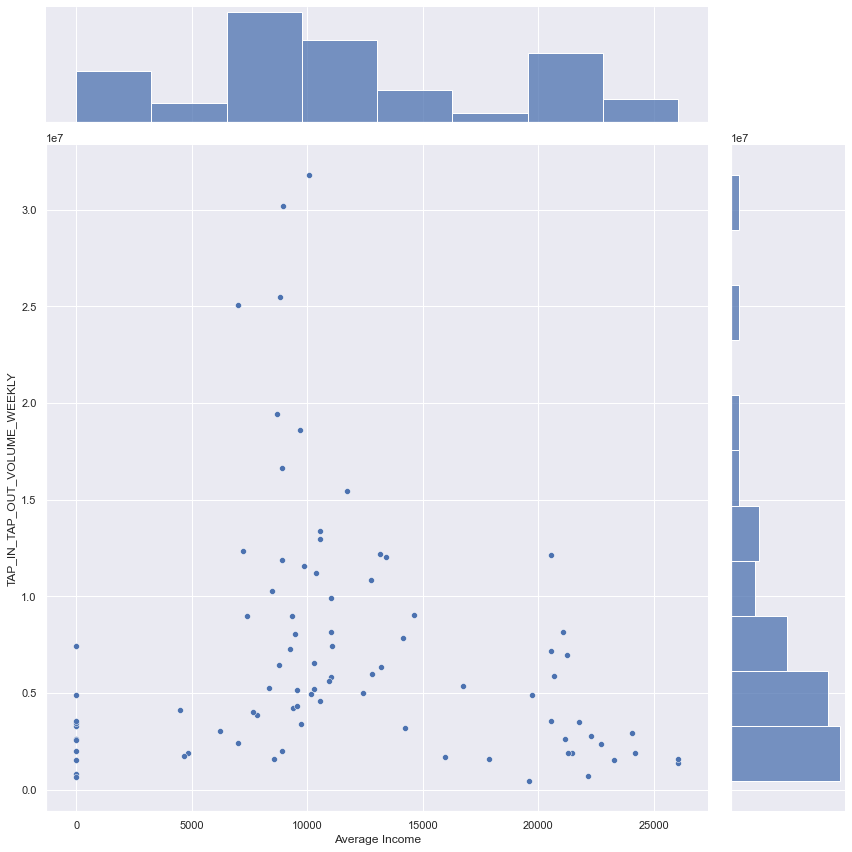

In [331]:
sb.jointplot(data = BusMRTGeoData_reg, x = 'Average Income', y = 'TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [332]:
BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['Average Income'])

-0.11799461908286209

In [333]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['Average Income'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [334]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [335]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [8609004.96396474]
Coefficients 	: a =  [[-145.50111722]]


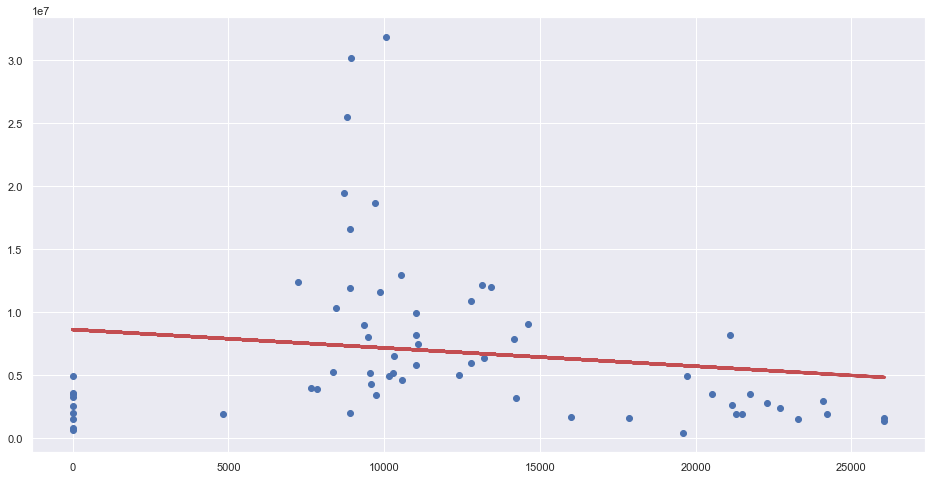

In [336]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [337]:
# Explained Variance in simply the "Score"
ev8 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev8)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse8 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse8)

Explained Variance (R^2) 	: 0.025023668656824594
Mean Squared Error (MSE) 	: 42407744831566.766


#### Prediction of Response based on the Predictor

Predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `Average Income` in the Test dataset.

In [338]:
y_test_pred = linreg.predict(X_test)

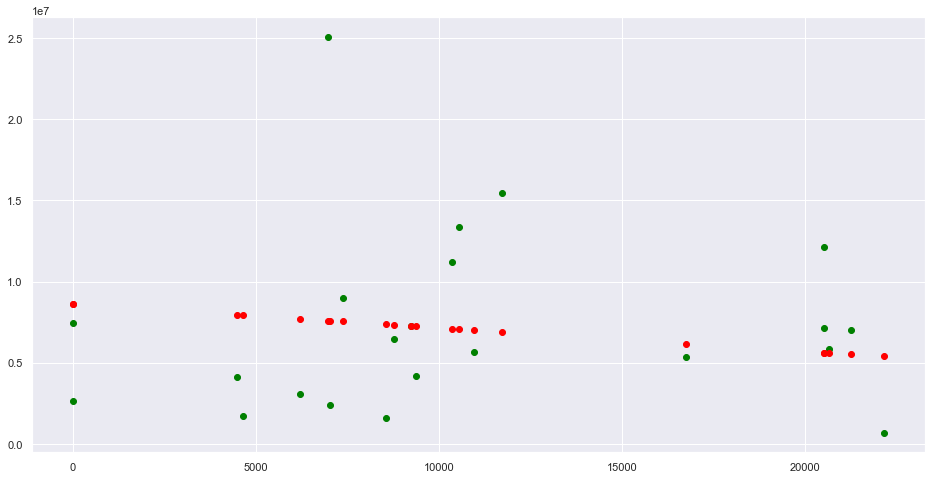

In [339]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [340]:
# Explained Variance in simply the "Score"
evTest8 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest8)
mseTest8 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest8)

Explained Variance (R^2) 	: -0.04579214741878901
Mean Squared Error (MSE) 	: 31421512231072.33


### Comparing the Uni-Variate Linear Models

In [342]:
variables = ['Peak Hour Percentage', 'Weekday Percentage', 'Male Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over', 'Average Income']
ev = [ev1, ev2, ev3, ev4, ev5, ev6, ev7, ev8]
mse = [mse1, mse2, mse3, mse4, mse5, mse6, mse7, mse8]
evTest = [evTest1, evTest2, evTest3, evTest4, evTest5, evTest6, evTest7, evTest8]
mseTest = [mseTest1, mseTest2, mseTest3, mseTest4, mseTest5, mseTest6, mseTest7, mseTest8]

for i in range(8):
    print(variables[i], ": Explained variance(train):", ev[i], "Mean Squared Error(train):", mse[i], "\nExplained variance(test):", evTest[i], "Mean Squared Error(test):", mseTest[i])
    print("\n")

Peak Hour Percentage : Explained variance(train): 0.06714677759214738 Mean Squared Error(train): 42717161256900.3 
Explained variance(test): 0.039681731860989444 Mean Squared Error(test): 22519622637624.734


Weekday Percentage : Explained variance(train): 0.016370995552130396 Mean Squared Error(train): 35335496500481.266 
Explained variance(test): -0.004405371599638386 Mean Squared Error(test): 51548198770905.83


Male Percentage : Explained variance(train): 0.0748892025705381 Mean Squared Error(train): 23901150507811.97 
Explained variance(test): -0.011009087540479356 Mean Squared Error(test): 79083968388404.69


00 - 19 : Explained variance(train): 0.44700620418766046 Mean Squared Error(train): 24051206385210.305 
Explained variance(test): 0.09345077506372912 Mean Squared Error(test): 27317156425120.2


20 - 39 : Explained variance(train): 0.5422221783340766 Mean Squared Error(train): 16992577565800.861 
Explained variance(test): 0.3350891292067484 Mean Squared Error(test): 31636501

* `TAP_IN_TAP_OUT_VOLUME_WEEKLY` vs `60 & Over` has the best Explained Variance (R^2) and minimum MSE on both the Train and Test Setsout of the models.   
* 5 variables to be used in the regression models would be `Peak Hour Percentage`, `00 - 19`, `20 - 39`, `40 - 59`, `60 & Over`
   


## Multivariate Linear Models

### Multi-Variate Regression

In [147]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg[['Peak Hour Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (64, 5) (64, 1)
Test Set  : (22, 5) (22, 1)


LinearRegression()

#### Coefficients of the Linear Regression Model

In [148]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [9476911.70330757]
Coefficients 	: a =  [[-3.33923741e+07 -2.08728692e+03  5.05514627e+02  1.87042637e+03
  -4.61678782e+02]]


#### Prediction of Response based on the Predictor

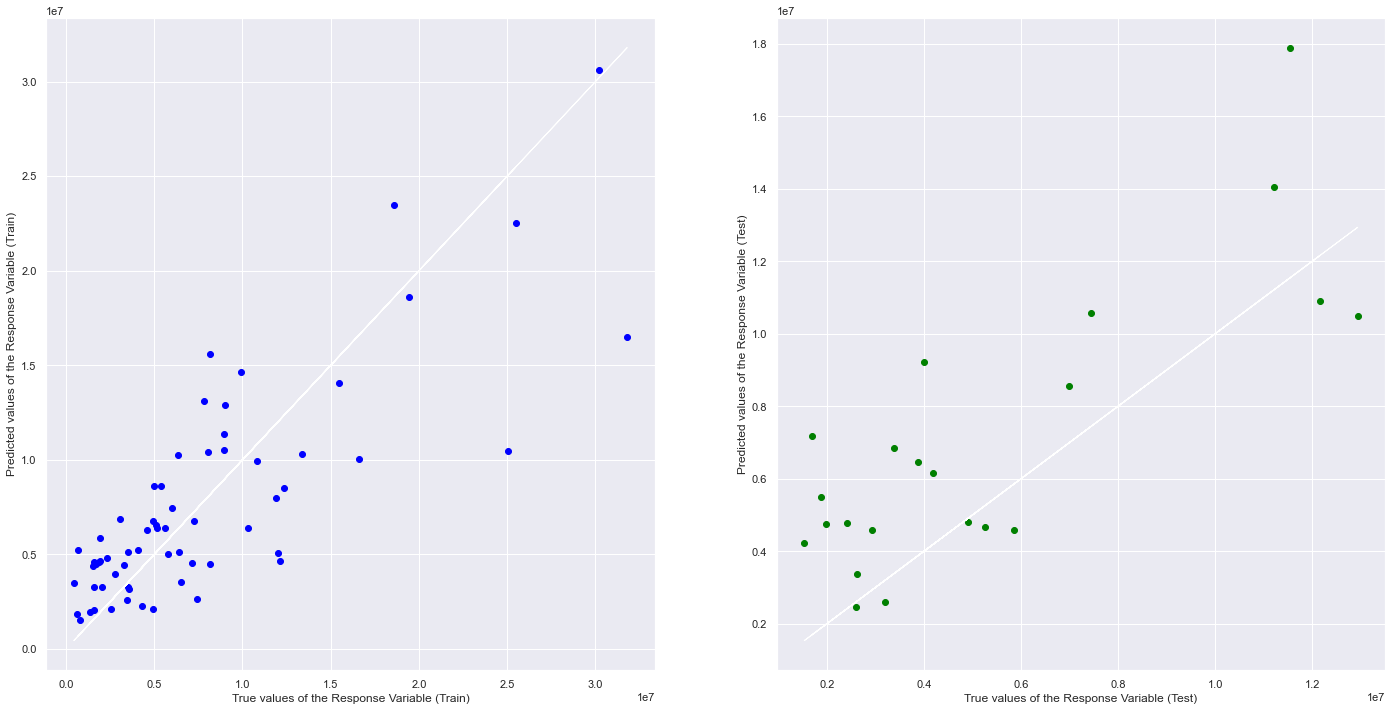

In [149]:
# Predict values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [150]:
from sklearn.metrics import r2_score
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.6563020116794732
Mean Squared Error (MSE) on Train Set 	: 16523202548213.326
Explained Variance (R^2) on Test Set 	: 0.3278182343018037
Mean Squared Error (MSE) on Test Set 	: 8515392013692.788


### Decision Tree Regression

In [89]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg[['Peak Hour Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

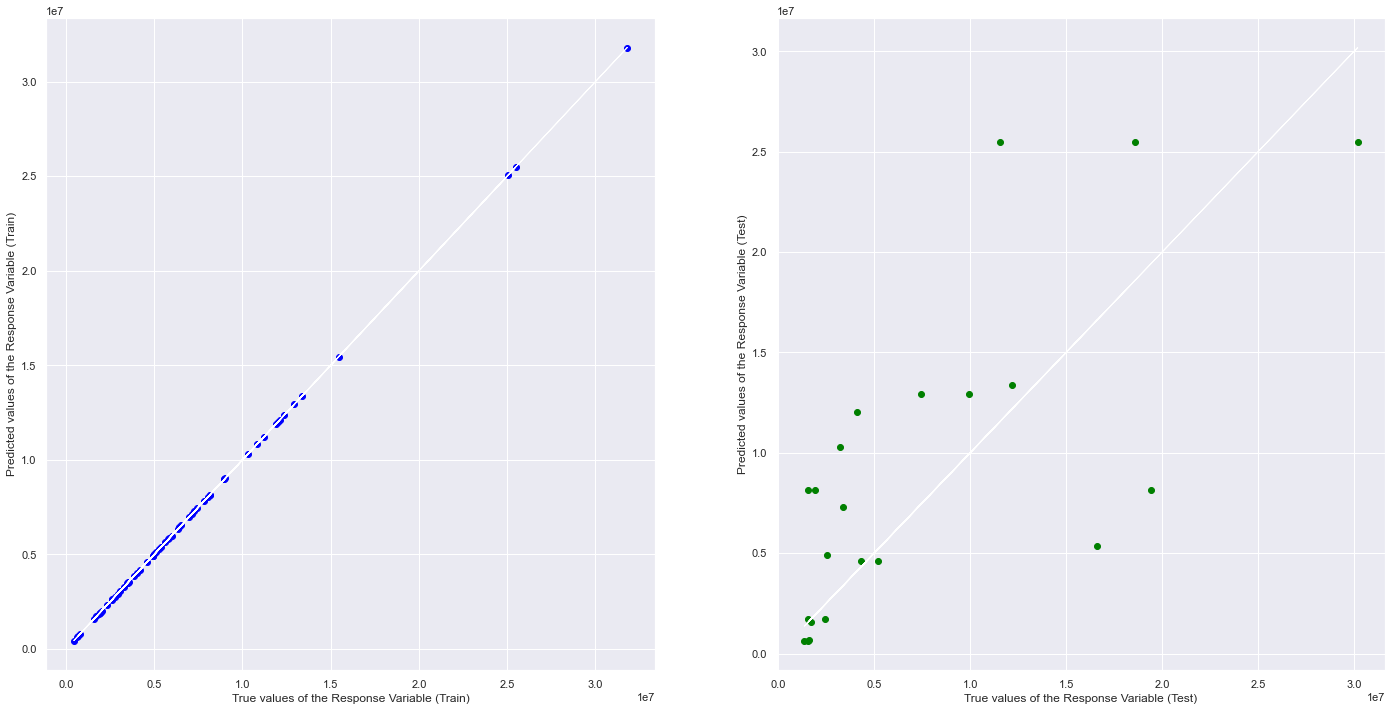

In [90]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Decision Tree Regression Model

In [91]:
from sklearn.metrics import r2_score
print("Explained Variance (R^2) on Train Set \t:", regressor.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) on Test Set \t:", regressor.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 1.0
Mean Squared Error (MSE) on Train Set 	: 0.0
Explained Variance (R^2) on Test Set 	: 0.38530454667224756
Mean Squared Error (MSE) on Test Set 	: 35323430846434.95


### Random Forest Regression

In [124]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg[['Peak Hour Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

from sklearn.ensemble import RandomForestRegressor
regress = RandomForestRegressor()
regress.fit(X_train, y_train)

<ipython-input-124-b4469b4b1b92>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regress.fit(X_train, y_train)


RandomForestRegressor()

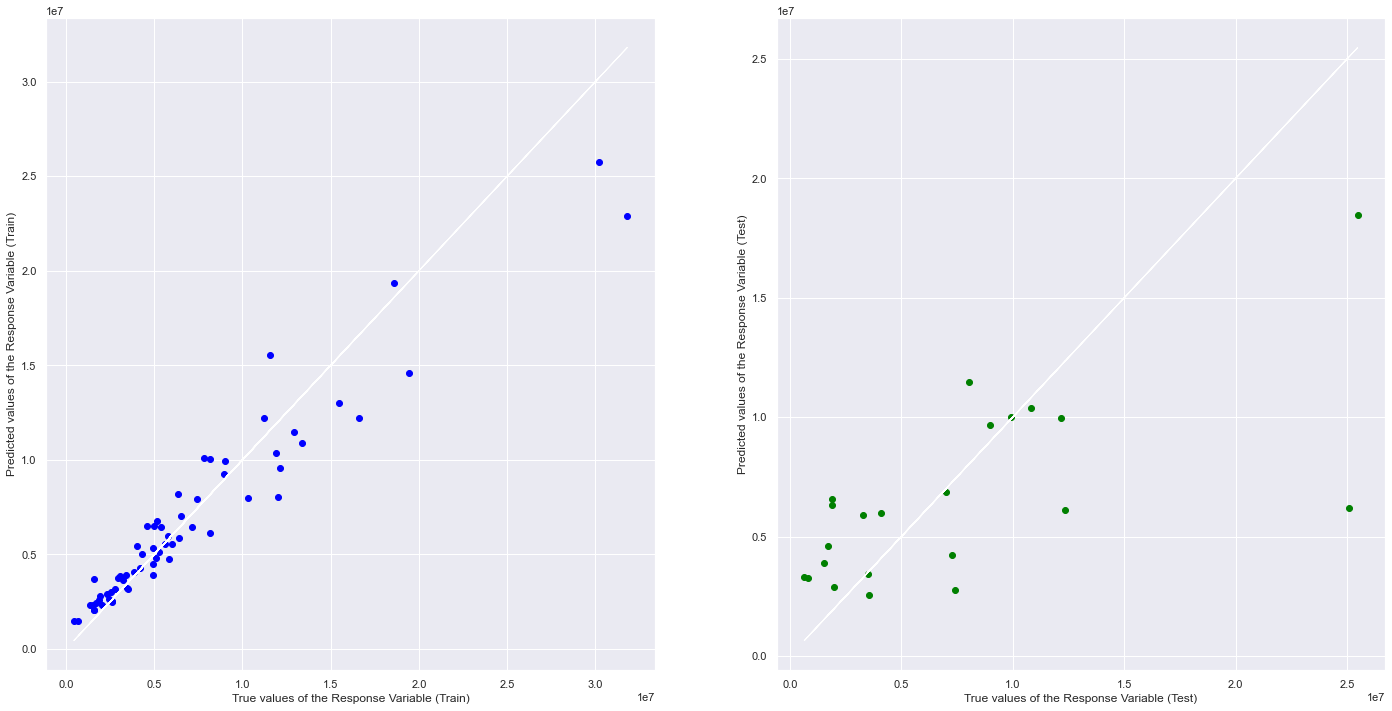

In [125]:
y_train_pred = regress.predict(X_train)
y_test_pred = regress.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Random Forest Regression Model

In [126]:
from sklearn.metrics import r2_score
print("Explained Variance (R^2) on Train Set \t:", regress.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) on Test Set \t:", regress.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.8973352460358922
Mean Squared Error (MSE) on Train Set 	: 3903596629637.9326
Explained Variance (R^2) on Test Set 	: 0.43244513566163734
Mean Squared Error (MSE) on Test Set 	: 26076751851401.363


* Random Forest Regression Model has the best Explained Variance (R^2) and minimum MSE on both the Train and Test Setsout of the models.   
* Therefore Random Forest Regression will be used to predict `TAP_IN_TAP_OUT_VOLUME_WEEKLY` in 2025
   


## Random Forest Regression

#### Feed demographic predictions in 2025 into the regression model, then find 20 subzones with the most tap ins and tap out (most traffic/demand for public transportation), hence these subzones will be most in need of MRT/Bus Stops

In [212]:
dT_predicted_subzone_data = pd.read_csv('dT_predicted_subzone_data.csv')
dT_predicted_subzone_data

,Male Percentage,00 - 19,20 - 39,40 - 59,60 & Over,Average Income,SUBZONE_N
0,0.492461,5122.252793,10458.081465,11223.163288,12593.503017,13975.923484,ALJUNIED
1,0.470599,4067.156260,5603.213452,5317.299340,7042.132011,19689.614782,ANAK BUKIT
2,0.491532,17236.756103,14465.103663,19500.791783,11801.692781,10323.206492,ANCHORVALE
3,0.480100,10976.204112,18958.853121,22056.100938,27943.153446,8936.342609,BEDOK NORTH
4,0.496267,4860.626994,7077.883636,7833.619187,6448.624985,12714.717735,BEDOK RESERVOIR
...,...,...,...,...,...,...,...
70,0.494843,20729.174355,19196.080855,32524.779177,7367.837088,10233.068491,WATERWAY EAST
71,0.497475,21820.835205,29345.543639,32416.392273,23409.661388,9628.062327,WOODLANDS EAST
72,0.503989,6106.183179,9709.618690,9311.253662,10994.809353,7373.988048,WOODLANDS WEST
73,0.497592,4707.983975,10597.570993,11633.502435,10049.571598,11200.734758,YEW TEE


In [213]:
peak_Hour_Percentage = BusMRTGeoData_reg.filter(['SUBZONE_N', 'Peak Hour Percentage'])
peak_Hour_Percentage

,SUBZONE_N,Peak Hour Percentage
0,ALJUNIED,0.171459
1,ANAK BUKIT,0.166717
2,ANCHORVALE,0.146781
3,BEDOK NORTH,0.152963
4,BEDOK RESERVOIR,0.170511
...,...,...
81,WOODLANDS EAST,0.167987
82,WOODLANDS WEST,0.156989
83,YEW TEE,0.166572
84,YIO CHU KANG,0.204672


In [214]:
dT_predicted_subzone_data = dT_predicted_subzone_data.filter(['Peak Hour Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over','SUBZONE_N'])
dT_predicted_subzone_data = pd.merge(peak_Hour_Percentage, dT_predicted_subzone_data, how='inner', on='SUBZONE_N') 
dT_predicted_subzone_data

,SUBZONE_N,Peak Hour Percentage,00 - 19,20 - 39,40 - 59,60 & Over
0,ALJUNIED,0.171459,5122.252793,10458.081465,11223.163288,12593.503017
1,ANAK BUKIT,0.166717,4067.156260,5603.213452,5317.299340,7042.132011
2,ANCHORVALE,0.146781,17236.756103,14465.103663,19500.791783,11801.692781
3,BEDOK NORTH,0.152963,10976.204112,18958.853121,22056.100938,27943.153446
4,BEDOK RESERVOIR,0.170511,4860.626994,7077.883636,7833.619187,6448.624985
...,...,...,...,...,...,...
70,WATERWAY EAST,0.148130,20729.174355,19196.080855,32524.779177,7367.837088
71,WOODLANDS EAST,0.167987,21820.835205,29345.543639,32416.392273,23409.661388
72,WOODLANDS WEST,0.156989,6106.183179,9709.618690,9311.253662,10994.809353
73,YEW TEE,0.166572,4707.983975,10597.570993,11633.502435,10049.571598


In [215]:
pd.DataFrame(dT_predicted_subzone_data[['Peak Hour Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over']])

,Peak Hour Percentage,00 - 19,20 - 39,40 - 59,60 & Over
0,0.171459,5122.252793,10458.081465,11223.163288,12593.503017
1,0.166717,4067.156260,5603.213452,5317.299340,7042.132011
2,0.146781,17236.756103,14465.103663,19500.791783,11801.692781
3,0.152963,10976.204112,18958.853121,22056.100938,27943.153446
4,0.170511,4860.626994,7077.883636,7833.619187,6448.624985
...,...,...,...,...,...
70,0.148130,20729.174355,19196.080855,32524.779177,7367.837088
71,0.167987,21820.835205,29345.543639,32416.392273,23409.661388
72,0.156989,6106.183179,9709.618690,9311.253662,10994.809353
73,0.166572,4707.983975,10597.570993,11633.502435,10049.571598


In [216]:
pred_2025 = pd.DataFrame(regress.predict(pd.DataFrame(dT_predicted_subzone_data[['Peak Hour Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over']])))
dT_predicted_subzone_data.insert(1, 'TAP_IN_TAP_OUT_VOLUME_WEEKLY_2025', pred_2025, True)
dT_predicted_subzone_data

,SUBZONE_N,TAP_IN_TAP_OUT_VOLUME_WEEKLY_2025,Peak Hour Percentage,00 - 19,20 - 39,40 - 59,60 & Over
0,ALJUNIED,11905168.70,0.171459,5122.252793,10458.081465,11223.163288,12593.503017
1,ANAK BUKIT,7356548.35,0.166717,4067.156260,5603.213452,5317.299340,7042.132011
2,ANCHORVALE,9291445.62,0.146781,17236.756103,14465.103663,19500.791783,11801.692781
3,BEDOK NORTH,20011893.51,0.152963,10976.204112,18958.853121,22056.100938,27943.153446
4,BEDOK RESERVOIR,7067299.17,0.170511,4860.626994,7077.883636,7833.619187,6448.624985
...,...,...,...,...,...,...,...
70,WATERWAY EAST,18285902.90,0.148130,20729.174355,19196.080855,32524.779177,7367.837088
71,WOODLANDS EAST,19219276.60,0.167987,21820.835205,29345.543639,32416.392273,23409.661388
72,WOODLANDS WEST,10681423.53,0.156989,6106.183179,9709.618690,9311.253662,10994.809353
73,YEW TEE,10842312.94,0.166572,4707.983975,10597.570993,11633.502435,10049.571598


In [217]:
dT_predicted_subzone_data = dT_predicted_subzone_data.sort_values(by=['TAP_IN_TAP_OUT_VOLUME_WEEKLY_2025'],ascending=False)
dT_predicted_subzone_data

,SUBZONE_N,TAP_IN_TAP_OUT_VOLUME_WEEKLY_2025,Peak Hour Percentage,00 - 19,20 - 39,40 - 59,60 & Over
28,JURONG WEST CENTRAL,20594721.63,0.177487,8753.205425,13430.176428,21294.620525,13943.247113
3,BEDOK NORTH,20011893.51,0.152963,10976.204112,18958.853121,22056.100938,27943.153446
21,FERNVALE,19568260.06,0.144997,21789.944591,19692.454212,40199.396285,11981.567527
61,TAMPINES EAST,19332833.99,0.156774,18670.117650,26002.917486,31163.876237,40363.341314
71,WOODLANDS EAST,19219276.60,0.167987,21820.835205,29345.543639,32416.392273,23409.661388
...,...,...,...,...,...,...,...
59,SUNGEI ROAD,2621575.40,0.157634,224.791111,372.852386,484.810787,678.620717
69,VICTORIA,2589740.15,0.156437,88.103915,276.537352,410.625627,702.040602
46,ONE NORTH,2526654.64,0.217564,178.706335,181.579636,377.528154,47.503429
49,PORT,2371219.01,0.225999,12.325169,42.149911,8.991005,27.758108


<AxesSubplot:xlabel='TAP_IN_TAP_OUT_VOLUME_WEEKLY_2025', ylabel='SUBZONE_N'>

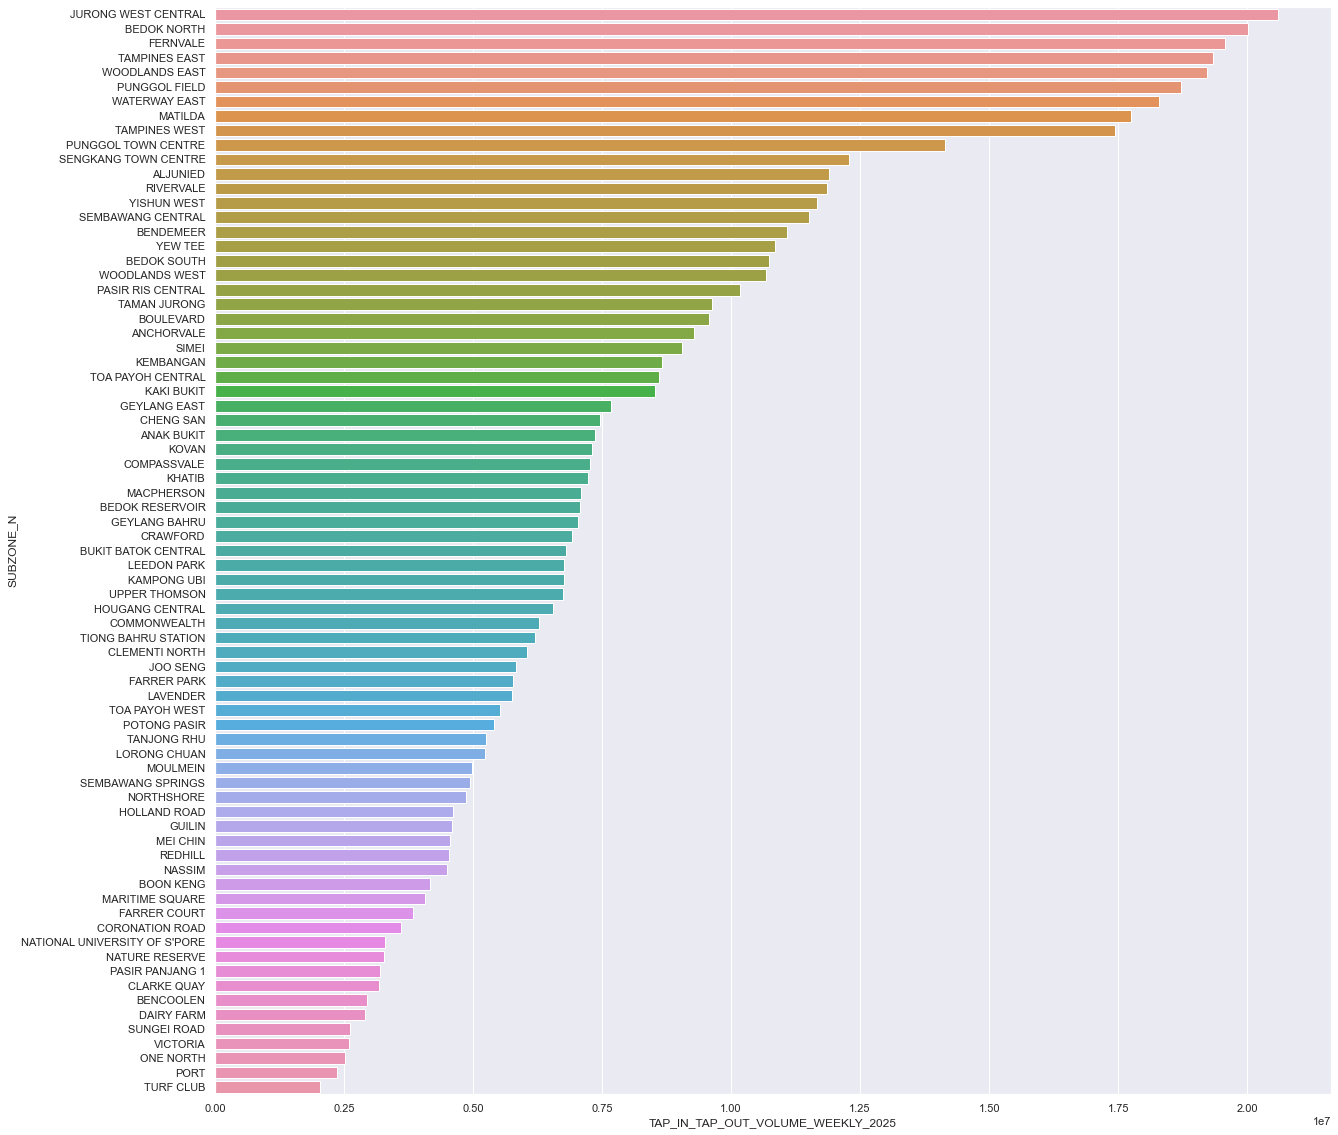

In [252]:
fig, ax = plt.subplots(figsize=(20, 20))
sb.barplot(ax=ax, x="TAP_IN_TAP_OUT_VOLUME_WEEKLY_2025", y="SUBZONE_N", data=dT_predicted_subzone_data)

In [235]:
dT_predicted_subzone_data_top20 = dT_predicted_subzone_data.head(20)
dT_predicted_subzone_data_top20

,SUBZONE_N,TAP_IN_TAP_OUT_VOLUME_WEEKLY_2025,Peak Hour Percentage,00 - 19,20 - 39,40 - 59,60 & Over
28,JURONG WEST CENTRAL,20594721.63,0.177487,8753.205425,13430.176428,21294.620525,13943.247113
3,BEDOK NORTH,20011893.51,0.152963,10976.204112,18958.853121,22056.100938,27943.153446
21,FERNVALE,19568260.06,0.144997,21789.944591,19692.454212,40199.396285,11981.567527
61,TAMPINES EAST,19332833.99,0.156774,18670.117650,26002.917486,31163.876237,40363.341314
71,WOODLANDS EAST,19219276.60,0.167987,21820.835205,29345.543639,32416.392273,23409.661388
51,PUNGGOL FIELD,18714418.24,0.153721,13138.094320,11882.928124,21044.738536,10669.777821
70,WATERWAY EAST,18285902.90,0.148130,20729.174355,19196.080855,32524.779177,7367.837088
39,MATILDA,17750707.69,0.152429,18149.352411,18905.659524,28547.467977,8197.378796
62,TAMPINES WEST,17439923.36,0.166681,15265.233780,23922.926214,20913.442726,23779.495070
52,PUNGGOL TOWN CENTRE,14140601.99,0.147408,16173.705398,12103.535766,22322.664862,4768.402312


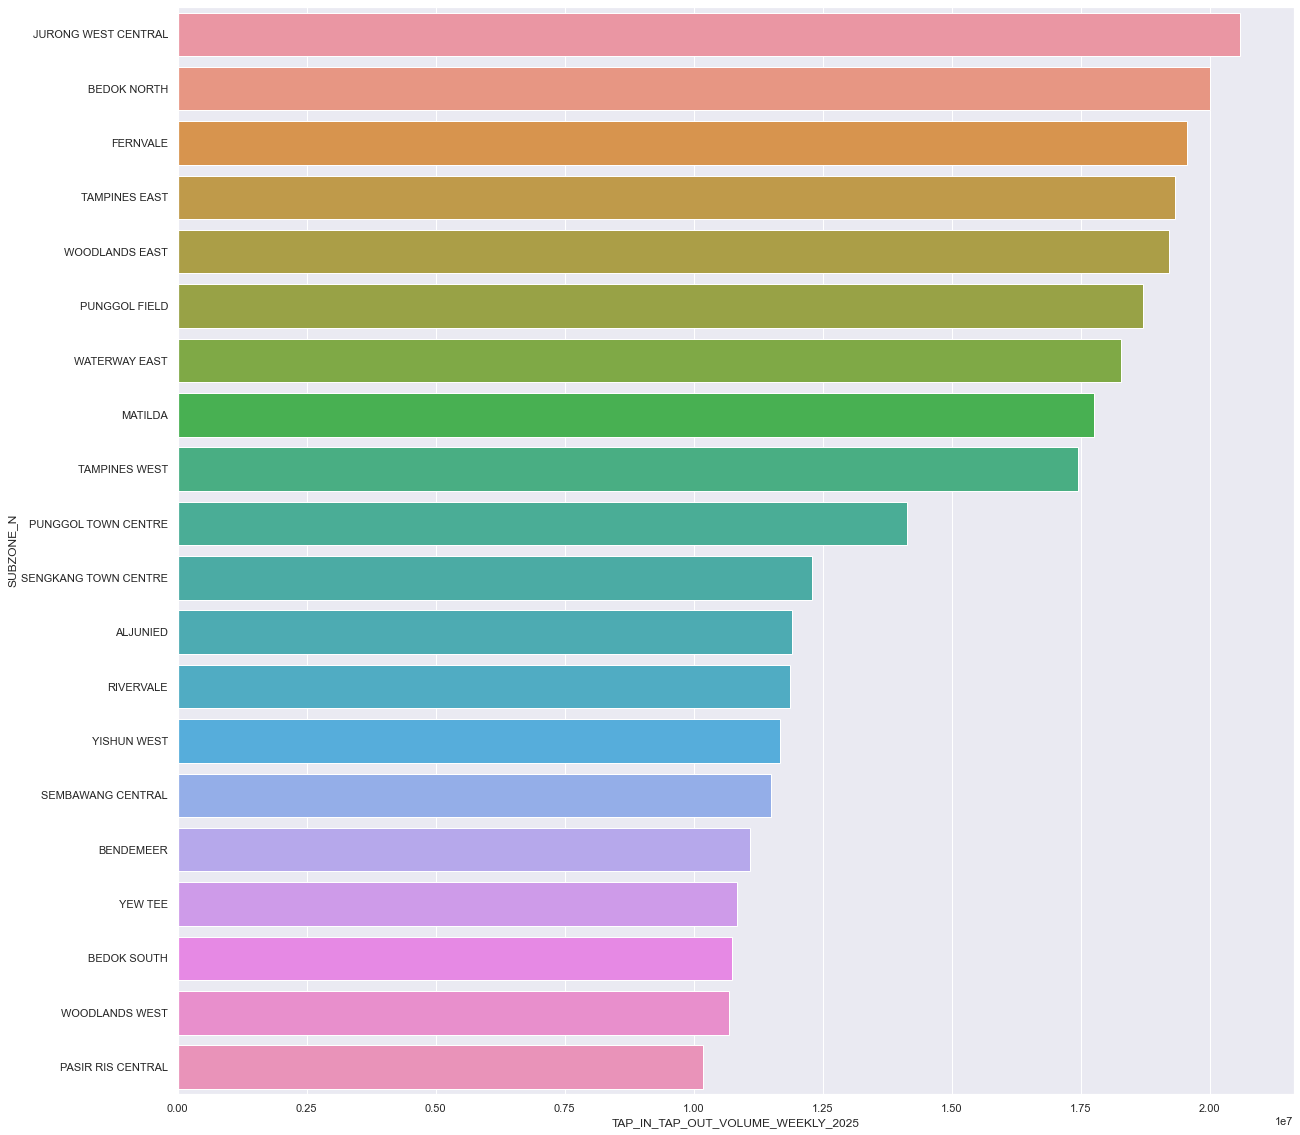

In [251]:
fig, ax = plt.subplots(figsize=(20, 20))
graph = sb.barplot(ax=ax, x="TAP_IN_TAP_OUT_VOLUME_WEEKLY_2025", y="SUBZONE_N", data=dT_predicted_subzone_data_top20)

In [200]:
listOfTop20Subzones = []
for i in range(20):
    listOfTop20Subzones.append(dT_predicted_subzone_data.iloc[i]['SUBZONE_N'])
listOfTop20Subzones

['JURONG WEST CENTRAL',
 'BEDOK NORTH',
 'FERNVALE',
 'TAMPINES EAST',
 'WOODLANDS EAST',
 'PUNGGOL FIELD',
 'WATERWAY EAST',
 'MATILDA',
 'TAMPINES WEST',
 'PUNGGOL TOWN CENTRE',
 'SENGKANG TOWN CENTRE',
 'ALJUNIED',
 'RIVERVALE',
 'YISHUN WEST',
 'SEMBAWANG CENTRAL',
 'BENDEMEER',
 'YEW TEE',
 'BEDOK SOUTH',
 'WOODLANDS WEST',
 'PASIR RIS CENTRAL']